In [1]:
# Import libraries and dependencies
import pandas as pd
import numpy as np
from pathlib import Path
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')


Bad key "text.kerning_factor" on line 4 in
C:\Users\derek\anaconda3\envs\dev\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
csv_path = Path('SMA_Analysis/Stocks/CVX.csv')
cvx_df=pd.read_csv(csv_path)
cvx_df = cvx_df.set_index(pd.DatetimeIndex(cvx_df['Date'].values))
cvx_df['daily_return'] = cvx_df['Close'].dropna().pct_change()
cvx_df.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,daily_return
2016-01-21,2016-01-21,63.535099,65.833004,62.906193,65.349236,16107800,0.0,0,NaN
2016-01-22,2016-01-22,68.098690,68.687279,65.889475,67.356911,15724600,0.0,0,0.030722
2016-01-25,2016-01-25,66.349028,67.961593,65.147668,65.220230,12370300,0.0,0,-0.031722
2016-01-26,2016-01-26,66.091029,68.130925,65.591131,67.824539,12191400,0.0,0,0.039931
2016-01-27,2016-01-27,67.687463,69.420973,66.405476,67.155319,12380600,0.0,0,-0.009867


In [3]:
#Calculate MACD and Signal line indicators
#Calcualte short term exponential moving average (EMA)
ShortEMA = cvx_df.Close.ewm(span=12, adjust=False).mean()
#Calculate the long term EMA
LongEMA = cvx_df.Close.ewm(span=26, adjust=False).mean()
#Calculate MACD
MACD = ShortEMA - LongEMA
#calculate signal line
signal = MACD.ewm(span=9, adjust=False).mean()
#create new columns for data
cvx_df['ShortEMA'] = ShortEMA
cvx_df['LongEMA'] = LongEMA
cvx_df['MACD'] = MACD
cvx_df['Signal Line'] = signal
#show the data
cvx_df.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,daily_return,ShortEMA,LongEMA,MACD,Signal Line
2016-01-21,2016-01-21,63.535099,65.833004,62.906193,65.349236,16107800,0.0,0,NaN,65.349236,65.349236,0.000000,0.000000
2016-01-22,2016-01-22,68.098690,68.687279,65.889475,67.356911,15724600,0.0,0,0.030722,65.658109,65.497952,0.160156,0.032031
2016-01-25,2016-01-25,66.349028,67.961593,65.147668,65.220230,12370300,0.0,0,-0.031722,65.590743,65.477380,0.113363,0.048298
2016-01-26,2016-01-26,66.091029,68.130925,65.591131,67.824539,12191400,0.0,0,0.039931,65.934404,65.651244,0.283160,0.095270
2016-01-27,2016-01-27,67.687463,69.420973,66.405476,67.155319,12380600,0.0,0,-0.009867,66.122237,65.762657,0.359580,0.148132


In [4]:
#Calculate RS and RSI
#Get difference in price
delta = cvx_df['Close'].diff(1)
delta = delta.dropna()
up = delta.copy()
down = delta.copy()

up[up<0]=0
down[down>0] = 0

#get time period
period = 14 
#calculate avg gain and average loss
AVG_Gain = up.rolling(window=period).mean()
AVG_Loss = abs(down.rolling(window=period).mean())

#calculate Relative Strength (RS)
RS = AVG_Gain / AVG_Loss

#calcvulate the RSI
RSI = 100.0 - (100.0 / (1.0 +RS))

#create new columns for data
cvx_df['RSI'] = RSI
cvx_df.head()


,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,daily_return,ShortEMA,LongEMA,MACD,Signal Line,RSI
2016-01-21,2016-01-21,63.535099,65.833004,62.906193,65.349236,16107800,0.0,0,NaN,65.349236,65.349236,0.000000,0.000000,NaN
2016-01-22,2016-01-22,68.098690,68.687279,65.889475,67.356911,15724600,0.0,0,0.030722,65.658109,65.497952,0.160156,0.032031,NaN
2016-01-25,2016-01-25,66.349028,67.961593,65.147668,65.220230,12370300,0.0,0,-0.031722,65.590743,65.477380,0.113363,0.048298,NaN
2016-01-26,2016-01-26,66.091029,68.130925,65.591131,67.824539,12191400,0.0,0,0.039931,65.934404,65.651244,0.283160,0.095270,NaN
2016-01-27,2016-01-27,67.687463,69.420973,66.405476,67.155319,12380600,0.0,0,-0.009867,66.122237,65.762657,0.359580,0.148132,NaN


In [5]:
#create Momentum Indicator
span=10
Close = cvx_df["Close"]

#create 10 day exponential moving average 
sma = Close.rolling(window=span, min_periods=span).mean()[:10]
rest = Close[10:]
TD = pd.concat([sma, rest]).ewm(span=span, adjust=False).mean()

MOMENTUM_A = 100 * (Close/TD)
cvx_df['MOMENTUM_A'] = MOMENTUM_A
cvx_df.head(25)

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,daily_return,ShortEMA,LongEMA,MACD,Signal Line,RSI,MOMENTUM_A
2016-01-21,2016-01-21,63.535099,65.833004,62.906193,65.349236,16107800,0.00,0,NaN,65.349236,65.349236,0.000000,0.000000,NaN,NaN
2016-01-22,2016-01-22,68.098690,68.687279,65.889475,67.356911,15724600,0.00,0,0.030722,65.658109,65.497952,0.160156,0.032031,NaN,NaN
2016-01-25,2016-01-25,66.349028,67.961593,65.147668,65.220230,12370300,0.00,0,-0.031722,65.590743,65.477380,0.113363,0.048298,NaN,NaN
2016-01-26,2016-01-26,66.091029,68.130925,65.591131,67.824539,12191400,0.00,0,0.039931,65.934404,65.651244,0.283160,0.095270,NaN,NaN
2016-01-27,2016-01-27,67.687463,69.420973,66.405476,67.155319,12380600,0.00,0,-0.009867,66.122237,65.762657,0.359580,0.148132,NaN,NaN
2016-01-28,2016-01-28,69.138782,69.896690,67.485899,69.275848,13017400,0.00,0,0.031576,66.607408,66.022893,0.584515,0.235409,NaN,NaN
2016-01-29,2016-01-29,67.768096,69.912806,66.881179,69.719299,20248900,0.00,0,0.006401,67.086160,66.296701,0.789459,0.346219,NaN,NaN
2016-02-01,2016-02-01,68.655012,69.412914,67.921291,68.767891,10958300,0.00,0,-0.013646,67.344888,66.479752,0.865136,0.450002,NaN,NaN
2016-02-02,2016-02-02,66.687663,66.953738,65.276668,65.502426,13326200,0.00,0,-0.047485,67.061432,66.407358,0.654075,0.490817,NaN,NaN
2016-02-03,2016-02-03,66.429677,68.235750,64.381717,68.227692,13964100,0.00,0,0.041606,67.240857,66.542197,0.698660,0.532385,NaN,101.168080


In [6]:
# Construct a crossover trading signal for MACD
cvx_df['crossover_long'] = np.where(cvx_df['MACD'] > cvx_df['Signal Line'], 1.0, 0.0)
cvx_df['crossover_short'] = np.where(cvx_df['MACD'] < cvx_df['Signal Line'], -1.0, 0.0)
cvx_df['MACD_Signal'] = cvx_df['crossover_long'] + cvx_df['crossover_short']


# Construct crossover trading signal for RSI
cvx_df['oversold'] = np.where(cvx_df['RSI'] < 30, 1.0, 0.0)
cvx_df['overbought'] = np.where(cvx_df['RSI'] > 70, -1.0, 0.0)
cvx_df['RSI_Signal'] = cvx_df['oversold'] + cvx_df['overbought']

# Construct crossover trading signal for Momentum
cvx_df['momentum_buy'] = np.where(cvx_df['MOMENTUM_A'] > 100, 1.0, 0.0)
cvx_df['momentum_sell'] = np.where(cvx_df['MOMENTUM_A'] < 100, -1.0, 0.0)
cvx_df['momentum_signal'] = cvx_df['momentum_buy'] + cvx_df['momentum_sell']

cvx_df.head(25)

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,daily_return,ShortEMA,...,MOMENTUM_A,crossover_long,crossover_short,MACD_Signal,oversold,overbought,RSI_Signal,momentum_buy,momentum_sell,momentum_signal
2016-01-21,2016-01-21,63.535099,65.833004,62.906193,65.349236,16107800,0.00,0,NaN,65.349236,...,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2016-01-22,2016-01-22,68.098690,68.687279,65.889475,67.356911,15724600,0.00,0,0.030722,65.658109,...,NaN,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2016-01-25,2016-01-25,66.349028,67.961593,65.147668,65.220230,12370300,0.00,0,-0.031722,65.590743,...,NaN,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2016-01-26,2016-01-26,66.091029,68.130925,65.591131,67.824539,12191400,0.00,0,0.039931,65.934404,...,NaN,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2016-01-27,2016-01-27,67.687463,69.420973,66.405476,67.155319,12380600,0.00,0,-0.009867,66.122237,...,NaN,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2016-01-28,2016-01-28,69.138782,69.896690,67.485899,69.275848,13017400,0.00,0,0.031576,66.607408,...,NaN,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2016-01-29,2016-01-29,67.768096,69.912806,66.881179,69.719299,20248900,0.00,0,0.006401,67.086160,...,NaN,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2016-02-01,2016-02-01,68.655012,69.412914,67.921291,68.767891,10958300,0.00,0,-0.013646,67.344888,...,NaN,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2016-02-02,2016-02-02,66.687663,66.953738,65.276668,65.502426,13326200,0.00,0,-0.047485,67.061432,...,NaN,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2016-02-03,2016-02-03,66.429677,68.235750,64.381717,68.227692,13964100,0.00,0,0.041606,67.240857,...,101.168080,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0


In [7]:
 # Set x variable list of features
x_var_list = ['MACD_Signal', 'RSI_Signal','momentum_signal']
cvx_df[x_var_list].head()

,MACD_Signal,RSI_Signal,momentum_signal
2016-01-21,0.0,0.0,0.0
2016-01-22,1.0,0.0,0.0
2016-01-25,1.0,0.0,0.0
2016-01-26,1.0,0.0,0.0
2016-01-27,1.0,0.0,0.0


In [8]:
cvx_df[x_var_list] = cvx_df[x_var_list].shift(1)
cvx_df[x_var_list].head()

,MACD_Signal,RSI_Signal,momentum_signal
2016-01-21,NaN,NaN,NaN
2016-01-22,0.0,0.0,0.0
2016-01-25,1.0,0.0,0.0
2016-01-26,1.0,0.0,0.0
2016-01-27,1.0,0.0,0.0


In [9]:
# Drop NAs and replace positive/negative infinity values
cvx_df.dropna(subset=x_var_list, inplace=True)
cvx_df.dropna(subset=['daily_return'], inplace=True)
cvx_df = cvx_df.replace([np.inf, -np.inf], np.nan)
cvx_df.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,daily_return,ShortEMA,...,MOMENTUM_A,crossover_long,crossover_short,MACD_Signal,oversold,overbought,RSI_Signal,momentum_buy,momentum_sell,momentum_signal
2016-01-22,2016-01-22,68.098690,68.687279,65.889475,67.356911,15724600,0.0,0,0.030722,65.658109,...,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2016-01-25,2016-01-25,66.349028,67.961593,65.147668,65.220230,12370300,0.0,0,-0.031722,65.590743,...,NaN,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2016-01-26,2016-01-26,66.091029,68.130925,65.591131,67.824539,12191400,0.0,0,0.039931,65.934404,...,NaN,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2016-01-27,2016-01-27,67.687463,69.420973,66.405476,67.155319,12380600,0.0,0,-0.009867,66.122237,...,NaN,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2016-01-28,2016-01-28,69.138782,69.896690,67.485899,69.275848,13017400,0.0,0,0.031576,66.607408,...,NaN,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
# Construct the dependent variable where if daily return is greater than 0, then 1, else, 0.
cvx_df['Positive Return'] = np.where(cvx_df['daily_return'] > 0, 1.0, 0.0)
cvx_df.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,daily_return,ShortEMA,...,crossover_long,crossover_short,MACD_Signal,oversold,overbought,RSI_Signal,momentum_buy,momentum_sell,momentum_signal,Positive Return
2016-01-22,2016-01-22,68.098690,68.687279,65.889475,67.356911,15724600,0.0,0,0.030722,65.658109,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2016-01-25,2016-01-25,66.349028,67.961593,65.147668,65.220230,12370300,0.0,0,-0.031722,65.590743,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2016-01-26,2016-01-26,66.091029,68.130925,65.591131,67.824539,12191400,0.0,0,0.039931,65.934404,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2016-01-27,2016-01-27,67.687463,69.420973,66.405476,67.155319,12380600,0.0,0,-0.009867,66.122237,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2016-01-28,2016-01-28,69.138782,69.896690,67.485899,69.275848,13017400,0.0,0,0.031576,66.607408,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [11]:
# Construct training start and end dates
training_start = cvx_df.index.min().strftime(format= '%Y-%m-%d')
training_end = '2019-12-31'

# Construct testing start and end dates
testing_start =  '2020-01-01'
testing_end = cvx_df.index.max().strftime(format= '%Y-%m-%d')

# Print training and testing start/end dates
print(f"Training Start: {training_start}")
print(f"Training End: {training_end}")
print(f"Testing Start: {testing_start}")
print(f"Testing End: {testing_end}")

Training Start: 2016-01-22
Training End: 2019-12-31
Testing Start: 2020-01-01
Testing End: 2021-01-20


In [12]:
X_train = cvx_df[x_var_list][training_start:training_end]
y_train = cvx_df['Positive Return'][training_start:training_end]

X_train.head()

,MACD_Signal,RSI_Signal,momentum_signal
2016-01-22,0.0,0.0,0.0
2016-01-25,1.0,0.0,0.0
2016-01-26,1.0,0.0,0.0
2016-01-27,1.0,0.0,0.0
2016-01-28,1.0,0.0,0.0


In [13]:
y_train.head()

2016-01-22    1.0
2016-01-25    0.0
2016-01-26    1.0
2016-01-27    0.0
2016-01-28    1.0
Name: Positive Return, dtype: float64

In [30]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

In [31]:
 # Fit a SKLearn linear regression using just the training set (X_train, Y_train):
model = RandomForestClassifier(n_estimators=100, max_depth=3, random_state=0)
model.fit(X_train, y_train)

# Make a prediction of "y" values from the X_test dataset
Predictions = model.predict(X_test)

# Assemble actual y data (Y_test) with predicted y data (from just above) into two columns in a dataframe:
Results = y_test.to_frame()
Results["Predicted Value"] = Predictions
Results.head()

,Positive Return,Predicted Value
2020-01-02,1.0,1.0
2020-01-03,0.0,1.0
2020-01-06,0.0,1.0
2020-01-07,0.0,1.0
2020-01-08,0.0,1.0


In [32]:
X_train.head(25)

,MACD_Signal,RSI_Signal,momentum_signal
2016-01-22,0.0,0.0,0.0
2016-01-25,1.0,0.0,0.0
2016-01-26,1.0,0.0,0.0
2016-01-27,1.0,0.0,0.0
2016-01-28,1.0,0.0,0.0
2016-01-29,1.0,0.0,0.0
2016-02-01,1.0,0.0,0.0
2016-02-02,1.0,0.0,0.0
2016-02-03,1.0,0.0,0.0
2016-02-04,1.0,0.0,1.0


In [33]:
y_train.head(25)

2016-01-22    1.0
2016-01-25    0.0
2016-01-26    1.0
2016-01-27    0.0
2016-01-28    1.0
2016-01-29    1.0
2016-02-01    0.0
2016-02-02    0.0
2016-02-03    1.0
2016-02-04    1.0
2016-02-05    0.0
2016-02-08    1.0
2016-02-09    0.0
2016-02-10    1.0
2016-02-11    0.0
2016-02-12    1.0
2016-02-16    1.0
2016-02-17    1.0
2016-02-18    0.0
2016-02-19    0.0
2016-02-22    1.0
2016-02-23    0.0
2016-02-24    1.0
2016-02-25    1.0
2016-02-26    0.0
Name: Positive Return, dtype: float64

In [42]:
# Save the pre-trained model
from joblib import dump, load
dump(model, 'random_forest_model.joblib')

['random_forest_model.joblib']

In [43]:
model = load('random_forest_model.joblib')
predictions = model.predict(X_test)
predictions

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 0., 0., 1., 0., 0.,
       1., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.

In [36]:
Results['Predicted Value'] = predictions
Results

,Positive Return,Predicted Value
2020-01-02,1.0,1.0
2020-01-03,0.0,1.0
2020-01-06,0.0,1.0
2020-01-07,0.0,1.0
2020-01-08,0.0,1.0
2020-01-09,0.0,1.0
2020-01-10,0.0,1.0
2020-01-13,1.0,1.0
2020-01-14,0.0,1.0
2020-01-15,0.0,1.0


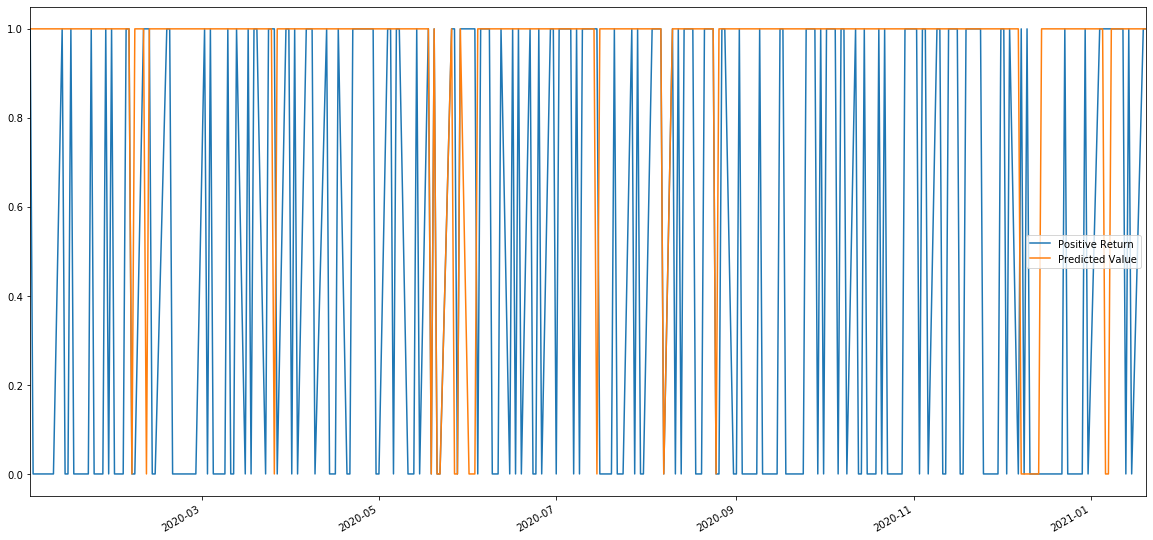

In [37]:
# Plot predicted results vs. actual results
Results[['Positive Return', 'Predicted Value']].plot(figsize=(20,10))

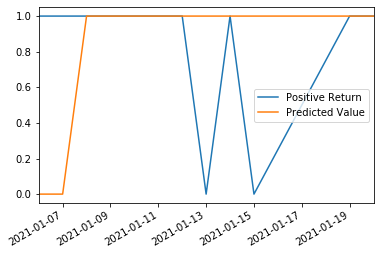

In [25]:
# Plot last 10 records of predicted vs. actual results
Results[['Positive Return', 'Predicted Value']].tail(10).plot()